In [31]:
import numpy as np
import cv2
from matplotlib import pyplot as plt 

In [32]:
img=cv2.imread('./test images/24ab.jpg')
img.shape

(705, 670, 3)

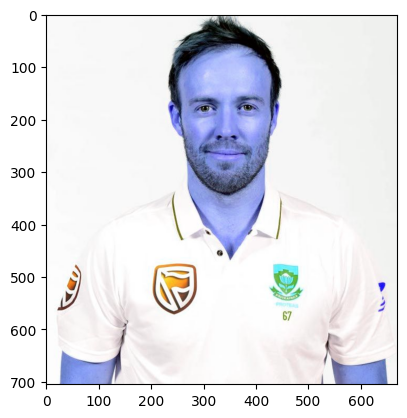

In [33]:
plt.imshow(img)

In [34]:
gray_img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_img.shape

(705, 670)

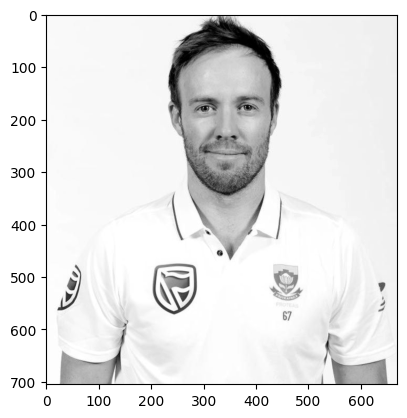

In [35]:
plt.imshow(gray_img,cmap='gray')

In [36]:
face_casced = cv2.CascadeClassifier('./openCV/haarcascade/haarcascade_frontalface_default.xml')
eye_casced = cv2.CascadeClassifier('./openCV/haarcascade/haarcascade_eye.xml')

faces=face_casced.detectMultiScale(gray_img,1.3,5)
faces

array([[228,  85, 227, 227]])

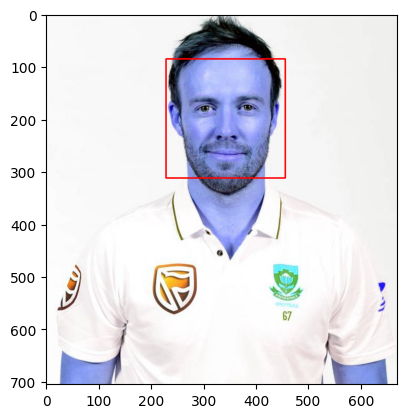

In [37]:
(x,y,w,h)=faces[0]
face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

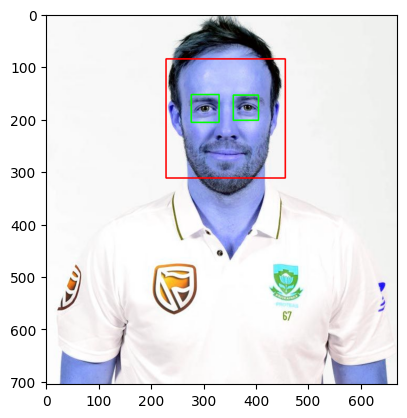

In [38]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray=gray_img[y:y+h,x:x+w]
    roi_color=face_img[y:y+h,x:x+w]
    eyes=eye_casced.detectMultiScale(roi_gray)
    for(ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.figure()
plt.imshow(face_img,cmap='gray')

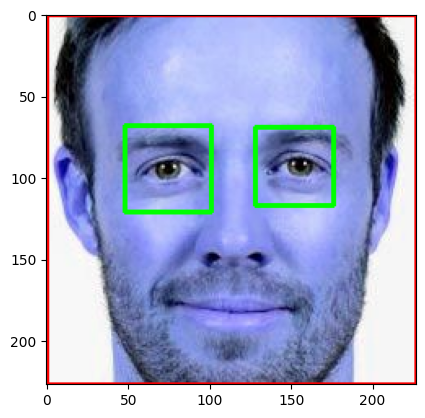

In [39]:
plt.imshow(roi_color,cmap='gray')

In [40]:
def get_cropped_face(image_path):
    img=cv2.imread(image_path)
    if img is not None:
        gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        faces=face_casced.detectMultiScale(gray,1.3,5)
        for (x,y,w,h) in faces:
            roi_gray=gray[y:y+h,x:x+w]
            roi_color=img[y:y+h,x:x+w]
            eyes =eye_casced.detectMultiScale(roi_gray)
            if len(eyes)>=2:
                return roi_color

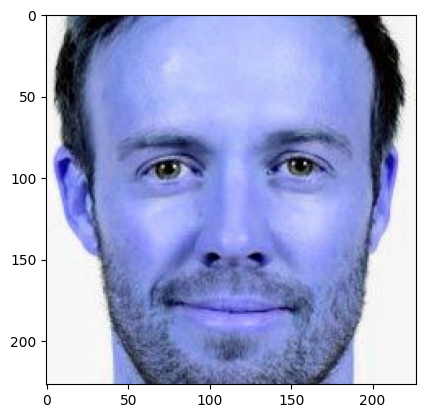

In [41]:
crop_img=get_cropped_face('./test images/24ab.jpg')
plt.imshow(crop_img)

In [42]:
path_to_data ="./Images(dataset)/"
path_to_cr_data ="./Images(dataset)/cropped img/"

In [43]:
import os
img_dirs=[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [44]:
img_dirs

['./Images(dataset)/ab de villiers',
 './Images(dataset)/bumrah',
 './Images(dataset)/Chris Gayle',
 './Images(dataset)/dhoni',
 './Images(dataset)/rohit sharma',
 './Images(dataset)/Sachin Tendulkar',
 './Images(dataset)/shikhar dhawan',
 './Images(dataset)/virat kohli']

In [45]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)    

In [46]:
crop_img_dirs=[]
celebrity_file_names_dict={}

for img_dir in img_dirs:
    count=1
    celebrity_name=img_dir.split ('/')[-1]
    print(celebrity_name)

    celebrity_file_names_dict[celebrity_name]=[]

    for entry in os.scandir(img_dir):
        roi_color=get_cropped_face(entry.path)
        if roi_color is not None:
            crop_folder=path_to_cr_data+celebrity_name
            if not os.path.exists(crop_folder):
                os.makedirs(crop_folder)
                crop_img_dirs.append(crop_folder)
                print("Genrating Cropped img :",crop_folder)
            crop_file_name=celebrity_name+str(count)+'.png'
            crop_file_path= crop_folder+'/'+crop_file_name
            cv2.imwrite(crop_file_path,roi_color)
            celebrity_file_names_dict[celebrity_name].append(crop_file_path)
            count+=1

ab de villiers
Genrating Cropped img : ./Images(dataset)/cropped img/ab de villiers
bumrah
Genrating Cropped img : ./Images(dataset)/cropped img/bumrah
Chris Gayle
Genrating Cropped img : ./Images(dataset)/cropped img/Chris Gayle
dhoni
Genrating Cropped img : ./Images(dataset)/cropped img/dhoni
rohit sharma
Genrating Cropped img : ./Images(dataset)/cropped img/rohit sharma
Sachin Tendulkar
Genrating Cropped img : ./Images(dataset)/cropped img/Sachin Tendulkar
shikhar dhawan
Genrating Cropped img : ./Images(dataset)/cropped img/shikhar dhawan
virat kohli
Genrating Cropped img : ./Images(dataset)/cropped img/virat kohli


In [56]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

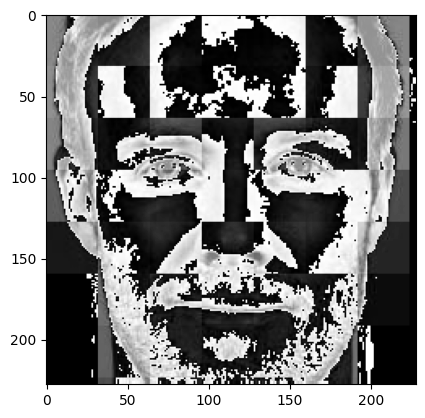

In [57]:
im_har = w2d(crop_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [58]:
celebrity_file_names_dict = {}
for img_dir in crop_img_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'ab de villiers': ['./Images(dataset)/cropped img/ab de villiers\\ab de villiers1.png',
  './Images(dataset)/cropped img/ab de villiers\\ab de villiers10.png',
  './Images(dataset)/cropped img/ab de villiers\\ab de villiers11.png',
  './Images(dataset)/cropped img/ab de villiers\\ab de villiers12.png',
  './Images(dataset)/cropped img/ab de villiers\\ab de villiers13.png',
  './Images(dataset)/cropped img/ab de villiers\\ab de villiers14.png',
  './Images(dataset)/cropped img/ab de villiers\\ab de villiers15.png',
  './Images(dataset)/cropped img/ab de villiers\\ab de villiers16.png',
  './Images(dataset)/cropped img/ab de villiers\\ab de villiers17.png',
  './Images(dataset)/cropped img/ab de villiers\\ab de villiers18.png',
  './Images(dataset)/cropped img/ab de villiers\\ab de villiers19.png',
  './Images(dataset)/cropped img/ab de villiers\\ab de villiers2.png',
  './Images(dataset)/cropped img/ab de villiers\\ab de villiers20.png',
  './Images(dataset)/cropped img/ab de villiers\

In [59]:
celebrity_file_names_dict.keys()

dict_keys(['ab de villiers', 'bumrah', 'Chris Gayle', 'dhoni', 'rohit sharma', 'Sachin Tendulkar', 'shikhar dhawan', 'virat kohli'])

In [60]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'ab de villiers': 0,
 'bumrah': 1,
 'Chris Gayle': 2,
 'dhoni': 3,
 'rohit sharma': 4,
 'Sachin Tendulkar': 5,
 'shikhar dhawan': 6,
 'virat kohli': 7}

In [61]:
x, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        x.append(combined_img)
        y.append(class_dict[celebrity_name])  

In [62]:
x=np.array(x).reshape(len(x),4096).astype(float)
x.shape

(512, 4096)

In [63]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(x_train, y_train)
pipe.score(x_test, y_test)

0.734375

In [65]:
print(classification_report(y_test, pipe.predict(x_test)))

              precision    recall  f1-score   support

           0       0.88      0.64      0.74        11
           1       1.00      0.78      0.88         9
           2       1.00      0.38      0.55         8
           3       0.55      0.60      0.57        10
           4       0.64      0.54      0.58        13
           5       0.73      0.85      0.79        26
           6       0.62      0.73      0.67        11
           7       0.76      0.85      0.80        40

    accuracy                           0.73       128
   macro avg       0.77      0.67      0.70       128
weighted avg       0.75      0.73      0.73       128



In [66]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [67]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [68]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.690021,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.494668,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.729187,{'logisticregression__C': 1}


In [94]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [99]:
best_estimators['svm'].score(x_test,y_test)

0.8046875

In [100]:
best_clf=best_estimators['svm']

In [101]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,best_clf.predict(x_test))
cm

array([[10,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  8,  0,  0,  0,  0,  0,  1],
       [ 2,  0,  5,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  8,  0,  1,  0,  1],
       [ 0,  0,  1,  2,  7,  0,  2,  1],
       [ 2,  0,  0,  1,  0, 22,  0,  1],
       [ 0,  0,  0,  0,  1,  0,  9,  1],
       [ 0,  0,  0,  2,  1,  1,  2, 34]], dtype=int64)

Text(50.722222222222214, 0.5, 'True')

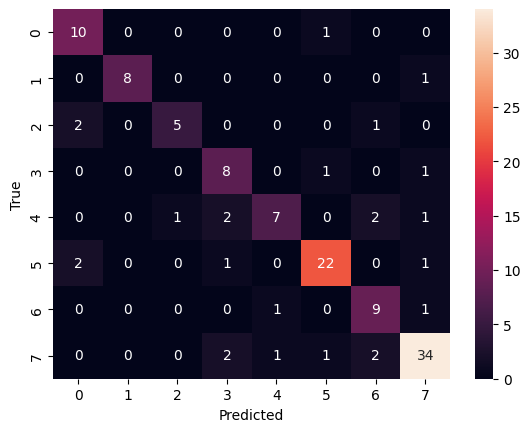

In [106]:
import seaborn as sns
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("True")

In [107]:
import joblib
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [ ]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))